In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import subprocess
from subprocess import Popen, PIPE, STDOUT

p = subprocess.Popen(f'make', shell=True, stdout=PIPE, stderr=STDOUT)
p.wait()

0

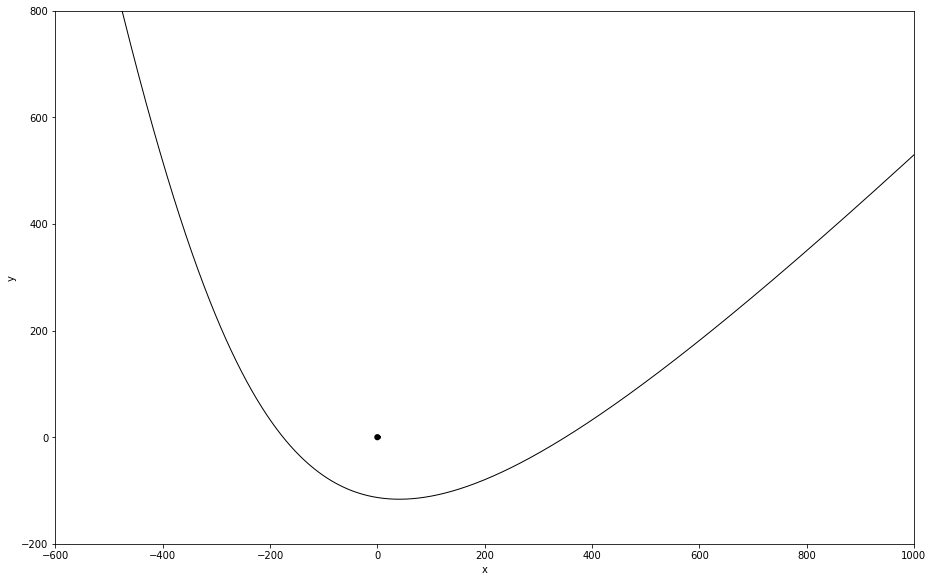

In [2]:
sx = -600
ex = 1000
sy = -200
ey = 800
size = 25

curc = [[],[]]
for i in range(0,100):
    curc[0].append(float(np.cos(i/50*np.pi)*3))
    curc[1].append(float(np.sin(i/50*np.pi)*3))

plt.figure(figsize=(abs(ex-sx)/(abs(ey-sy)+abs(ex-sx))*size, abs(ey-sy)/(abs(ey-sy)+abs(ex-sx))*size), dpi=72)
plt.ion()
plt.xlabel('x')
plt.ylabel('y')
plt.axis([sx,ex,sy,ey])

M = pow(10,10)

p = subprocess.Popen(f'./main 25 {M} 2000  1500 -1.5 -1.5', shell=True, stdout=PIPE, stderr=STDOUT)
p.wait()
with open(f'./trajectory.txt') as f:
    cf = f.read().replace(" ", "").splitlines()
    for i in range(0, len(cf)):
        cf[i] = cf[i].split('|')
        for j in range(0,len(cf[i])):
            cf[i][j]=float(cf[i][j])
    cf = np.transpose(cf)
    plt.plot(cf[1],cf[2], linewidth=1., color='black')
    plt.plot(curc[0],curc[1], linewidth=3., color='black')    
plt.grid(False)
plt.savefig('plot.png', transparent=False, format='png')

In [3]:
p = subprocess.Popen(f'make clean', shell=True, stdout=PIPE, stderr=STDOUT)
p.wait()

0